In [1]:
cat('Last updated ', date())

Last updated  Sat Oct 22 13:13:38 2022

_This is a study note while I am studyig __Generalized Linear Models and Nonparametric Regression__ offered by University of Colorado Boulder in Coursera_

### Loess Fit in R

__MSE using taylor expansion using a weight funcion__


$MSE^w_{Taylor} = \frac{1}{n}
                \sum_{i=1}^{n} \underbrace{ w_i(x-x_0)}_\text{(*)}
                (Y_i - 
                \sum_{j=0}^p
                \beta_j(x-x_0)^p)^2)$
                
Where $\beta_j = \frac{f^{(j)}(x_0)}{j!}$, 

(*) only care about points very close to $x_0$


There are different possible weight function you can use, the standard one is


$w_i(x) =\begin{cases} (1 - |x|^3)^3  & if \; |x| <1 \\
                         1  & if  \; |x| \ge 1
       \end{cases}$
       

Suppose $U(0,\pi/2)$, and let $Y = \sin(\pi x) + \varepsilon$, where $\varepsilon \overset{iid}{\sim} N(0,0.5^2)$.

In [22]:
set.seed(123)

n = 150
x = runif(n, 0, pi/2) 
y = sin(pi*x) + rnorm(n, 0, 0.5) + 4

df = data.frame(x = x, y = y)
head(df)

,x,y
,<dbl>,<dbl>
1,0.45172571,5.501308
2,1.23826681,3.177046
3,0.64241945,4.291206
4,1.38704049,3.152961
5,1.47728256,2.933100
6,0.07155998,4.225805


In [25]:
setwd('C:/Users/shims/Desktop/Generalized Linear Models and Nonparametric Regression')

In [26]:
library(cowplot)
library(ggplot2)

__Loess vs Linear__

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image



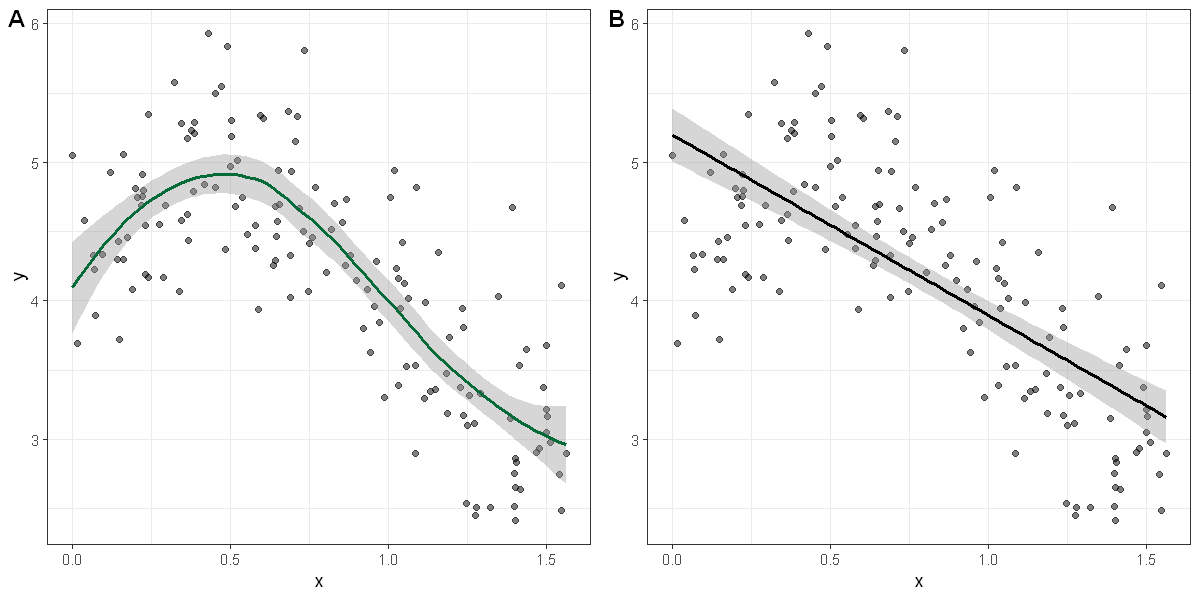

In [41]:
options(repr.plot.width = 10, repr.plot.height = 5)

plot1 <- ggplot(df, aes(x = x, y = y)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth( method = "loess",  col = "#046A38") + 
    theme_bw() 

plot2 <- ggplot(df, aes(x = x, y = y)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(method = "lm", col = "black") +
    theme_bw()  

plot_grid(plot1, plot2, labels = "AUTO")
ggsave("plot.pdf")

In the graph, we see that the loess captures the systematic variability in the data much better then linear regression does. 

__Fit a loess model__

In [49]:
l = loess(y ~ x, data = df) #fit a model
newdata = seq(0.1,0.75, length.out = 4) # new data
pred = predict(l, newdata, se = T) # prediction
# se =T to obtain the standard error associated with the model. 
cat("Here are the predicted values: ", pred$fit, ".")

Here are the predicted values:  4.401635 4.821459 4.904826 4.597158 .

In [51]:
p
ce = cbind(pred$fit - qt(0.975,pred$df)*pred$se, pred$fit + qt(0.975,pred$df)*pred$se)

cat(" Here are the confidence intervals associated with predictions at the new data:")
ce

$fit
[1] 4.401635 4.821459 4.904826 4.597158

$se.fit
[1] 0.10916558 0.06541277 0.07262864 0.07870454

$residual.scale
[1] 0.4845928

$df
[1] 145.2731

 Here are the confidence intervals associated with predictions at the new data:

4.185878,4.617393
4.692175,4.950742
4.761281,5.048372
4.441604,4.752712
